그룹 연산
- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 group() 메소드를 사용함
- 그룹 객체 만들기(분할)
- 그룹 연산 메소드(적용, 결합)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
print('승객수 : ',len(df))
print(df.head())

승객수 :  891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [2]:
df.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [21]:
grouped = df.groupby(['class'])
#list(grouped)
for key, group in grouped:
    print('* key: ',key)
    print('* number: ',len(group))
    print(group.head())

* key:  First
* number:  216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key:  Second
* number:  184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key:  Third
* number:  491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [22]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [7]:
average = grouped.mean()
average

age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363

In [8]:
grouped.max()

age   sex      fare  survived
class                                 
First   80.0  male  512.3292         1
Second  70.0  male   73.5000         1
Third   74.0  male   69.5500         1

In [24]:
# Q. 'Third' 그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.

# group3 = df.loc[df['class']=='Third']
# group3.describe().round()

group3 = grouped.get_group('Third')
group3.describe().round()

age   fare  survived
count  355.0  491.0     491.0
mean    25.0   14.0       0.0
std     12.0   12.0       0.0
min      0.0    0.0       0.0
25%     18.0    8.0       0.0
50%     24.0    8.0       0.0
75%     32.0   16.0       0.0
max     74.0   70.0       1.0

In [25]:
# class 열, sex 열을 기준으로 분할하여 grouped.two에 저장
grouped_two = df.groupby(['class','sex'])
for key, group in grouped_two:
    print('* key: ',key)
    print('* number: ',len(group))
    print(group.head())

* key:  ('First', 'female')
* number:  94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
* key:  ('First', 'male')
* number:  122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
* key:  ('Second', 'female')
* number:  76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
* key:  ('Second', 'male')
* number:  108
     age   sex   class  fare  survived
17   NaN  mal

In [27]:
average_two=grouped_two.mean()
average_two

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [32]:
# Q. ('Third',female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력하세요.
grouped_two = df.groupby(['class','sex'])
group3f = grouped_two.get_group(('Third','female'))
group3f.head()


age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third  11.1333         1
10   4.0  female  Third  16.7000         1
14  14.0  female  Third   7.8542         0
18  31.0  female  Third  18.0000         0

In [33]:
group3f[['age','fare']].describe()

age        fare
count  102.000000  144.000000
mean    21.750000   16.118810
std     12.729964   11.690314
min      0.750000    6.750000
25%     14.125000    7.854200
50%     21.500000   12.475000
75%     29.750000   20.221875
max     63.000000   69.550000

적용-결합
데이터 집계(agg)
- 집계 연산을 처리하는 사용자 정의함수를 그룹 객체에 적용하려면 agg() 메소드 사용
- 모든 열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,...])
- 각 열마다 다른 함수를 매핑 : group객체.agg({'열1':함수1,'열2':함수2,...})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링 : group객체.filter(조건 함수식)

객체에 함수 매핑(apply)
- 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
- group객체.apply(매핑함수)


In [70]:
# Q. (최대값 - 최소값)을 반환하는 사용자 함수를 정의하고 agg() 함수에 인수로 전달하여 그룹별로 집계하여
# agg_minmax 이름으로 저장 후 처음 5개행을 출력하세요.

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','sex','class','fare','survived']]
grouped = df.groupby(['class'])

def m_M():
    return grouped.max() - grouped.min()
agg_all=grouped.agg([m_M()])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [45]:
# Q. grouped의 모든 열에 min, max 함수를 적용하여 출력하세요.
agg_all=grouped.agg(['min','max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [59]:
# Q. grouped에서 age열은 mean, fare열은 min, max 함수를 적용하여 출력하세요
agg_a=grouped.agg({'age':'mean','fare':['min','max']})
agg_a

age fare          
             mean  min       max
class                           
First   38.233441  0.0  512.3292
Second  29.877630  0.0   73.5000
Third   25.140620  0.0   69.5500

In [71]:
# Q. 데이터의 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 처음 5개행을 출력하세요.
# a=grouped.filter(len([]'class']) >= 200)
grouped_filter = grouped.filter(lambda x: len(x)>=200)
print(grouped_filter,'\n')
grouped_filter.value_counts('class')

      age     sex  class     fare  survived
0    22.0    male  Third   7.2500         0
1    38.0  female  First  71.2833         1
2    26.0  female  Third   7.9250         1
3    35.0  female  First  53.1000         1
4    35.0    male  Third   8.0500         0
..    ...     ...    ...      ...       ...
885  39.0  female  Third  29.1250         0
887  19.0  female  First  30.0000         1
888   NaN  female  Third  23.4500         0
889  26.0    male  First  30.0000         1
890  32.0    male  Third   7.7500         0

[707 rows x 5 columns] 



class
Third     491
First     216
Second      0
dtype: int64

In [72]:
# Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 끝에서 5개 행 출력
age_filter = grouped.filter(lambda x : x.age.mean() < 30)
age_filter.tail(5)

age     sex   class    fare  survived
884  25.0    male   Third   7.050         0
885  39.0  female   Third  29.125         0
886  27.0    male  Second  13.000         0
888   NaN  female   Third  23.450         0
890  32.0    male   Third   7.750         0

In [73]:
# Q. 각 그룹별 통계요약표를 집계하세요.
for key, group in grouped:
    print(key, group.describe(),'\n')

First               age        fare    survived
count  186.000000  216.000000  216.000000
mean    38.233441   84.154687    0.629630
std     14.802856   78.380373    0.484026
min      0.920000    0.000000    0.000000
25%     27.000000   30.923950    0.000000
50%     37.000000   60.287500    1.000000
75%     49.000000   93.500000    1.000000
max     80.000000  512.329200    1.000000 

Second               age        fare    survived
count  173.000000  184.000000  184.000000
mean    29.877630   20.662183    0.472826
std     14.001077   13.417399    0.500623
min      0.670000    0.000000    0.000000
25%     23.000000   13.000000    0.000000
50%     29.000000   14.250000    0.000000
75%     36.000000   26.000000    1.000000
max     70.000000   73.500000    1.000000 

Third               age        fare    survived
count  355.000000  491.000000  491.000000
mean    25.140620   13.675550    0.242363
std     12.495398   11.778142    0.428949
min      0.420000    0.000000    0.000000
25%     18.

In [74]:
agg_grouped = grouped.apply(lambda x: x.describe())
agg_grouped

age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [75]:
# Q. 평균값에서 표준편차의 몇배 떨어져 있는지를 평가하는 사용자 함수를 작성하세요.
def z_score(x):
    return (x- x.mean())/x.std()

In [76]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 transform() 함수로 변환하세요.
grouped.age.transform(z_score)[:3]

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [77]:
# Q. 위에서 구한 사용자 함수를 이용하여 age 칼럼을 apply() 함수로 매핑하여 출력하세요.
grouped.age.apply(z_score)[:3]

0   -0.251342
1   -0.015770
2    0.068776
Name: age, dtype: float64

In [78]:
grouped[['age']].apply(lambda x : z_score(x))[:3]

age
0 -0.251342
1 -0.015770
2  0.068776

In [66]:
df1=df.groupby(['class','sex'])
type(df1)

pandas.core.groupby.generic.DataFrameGroupBy

In [67]:
df2=df1.mean()
type(df2)

pandas.core.frame.DataFrame

In [68]:
# Q. class 값이 First인 행을 선택하여 출력하세여.
df2.loc['First']

age        fare  survived
sex                                    
female  34.611765  106.125798  0.968085
male    41.281386   67.226127  0.368852

In [69]:
# Q. class 값이 First이고 sex값이 female인 행을 선택하여 출력하세요.
df2.loc[('First','female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

피벗
- 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [3]:
import pandas as pd
df2=pd.read_pickle('./dataset/df2.pkl')
df2.head()

0   1   2   3   4   5
0  NaN  c0  c1  c2  c3  c4
1  0.0   0   1   2   3   4
2  1.0   5   6   7   8   9

In [6]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic.copy()
df = df.loc[:,['age','sex','class','fare','survived']]
display(df.head())

age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0

In [11]:
# 행, 열 ,값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df
                     ,index = 'class' # 행 위치에 들어갈 열
                     ,columns='sex'   # 열 위치에 들어갈 열
                     ,values = 'survived'  # 데이터로 사용할 열
                     ,aggfunc = 'mean'# 데이터 집계 함수
                     )
pdf1.head()

sex       female      male
class                     
First   0.968085  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447

In [10]:
pdf2 = pd.pivot_table(df
                     ,index = 'class' # 행 위치에 들어갈 열
                     ,columns='sex'   # 열 위치에 들어갈 열
                     ,values = 'survived'  # 데이터로 사용할 열
                     ,aggfunc = ['mean','sum']# 데이터 집계 함수
                     )
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [14]:
pdf3 = pd.pivot_table(df
                     ,index = ['class','sex'] # 행 위치에 들어갈 열
                     ,columns= 'survived'   # 열 위치에 들어갈 열
                     ,values = ['age','fare']  # 데이터로 사용할 열
                     ,aggfunc = ['mean','max']# 데이터 집계 함수
                     )
pdf3.head()

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875

In [29]:
# Q. titanic 데이터에 대하여 피벗을 사용하여 의미있는 탐색을 수행하고 2가지 이상의 인사이트를 기술하세요.
titanic = sns.load_dataset('titanic')
df = titanic.copy()

def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))


pdf=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])
pdf

mean                                                      \
age_cat           Adult      Baby     Child   Elderly  Teenager Young_adult   
class  sex                                                                    
First  female  0.972222  0.000000       NaN  1.000000  1.000000    0.969697   
       male    0.370370  1.000000  1.000000  0.181818  0.250000    0.535714   
Second female  0.850000  1.000000  1.000000  1.000000  1.000000    0.921053   
       male    0.037037  1.000000  1.000000  0.250000  0.100000    0.060000   
Third  female  0.142857  0.733333  0.000000  0.604651  0.590909    0.476190   
       male    0.068182  0.384615  0.333333  0.091837  0.078947    0.161972   

                sum                                          
age_cat       Adult Baby Child Elderly Teenager Young_adult  
class  sex                                                   
First  female    35    0     0      11       13          32  
       male      20    2     1       6        1          15  
Second female    17    5     3       2        8          35  
       male       1    8     1       3        1           3  
Third  female     2   11     0      26       13          20  
       male       3    5     4       9        3          23

In [ ]:
pdf1=pd.pivot_table(df, index = ['class','sex'],columns='age_cat' ,values='survived', aggfunc=['mean','sum'])

시계열 데이터
- df의 행 인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용
- 특정 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능

In [1]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [2]:
df['new_Date']=pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [3]:
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039

In [4]:
df1 = df1.reset_index()
df1.head()

new_Date  Close  Start   High    Low  Volume
0 2018-07-02  10100  10850  10900  10000  137977
1 2018-06-29  10700  10550  10900   9990  170253
2 2018-06-28  10400  10900  10950  10150  155769
3 2018-06-27  10900  10800  11050  10500  133548
4 2018-06-26  10800  10900  11000  10700   63039

In [5]:
df1=df.copy()
df1['Year'] = df1.new_Date.dt.year
df1.head()

Date  Close  Start   High    Low  Volume   new_Date  Year
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018

In [6]:
df1['Month'] = df1.new_Date.dt.month
df1.head()

Date  Close  Start   High    Low  Volume   new_Date  Year  Month
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6

In [7]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m']=df1.new_Date.dt.to_period(freq='M')
df1.head()

Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   

    Date_m  
0  2018-07  
1  2018-06  
2  2018-06  
3  2018-06  
4  2018-06

In [8]:
df1.set_index('new_Date',inplace=True)
df1.drop('Date',axis=1,inplace=True)
df1.head()

Close  Start   High    Low  Volume  Year  Month   Date_m
new_Date                                                            
2018-07-02  10100  10850  10900  10000  137977  2018      7  2018-07
2018-06-29  10700  10550  10900   9990  170253  2018      6  2018-06
2018-06-28  10400  10900  10950  10150  155769  2018      6  2018-06
2018-06-27  10900  10800  11050  10500  133548  2018      6  2018-06
2018-06-26  10800  10900  11000  10700   63039  2018      6  2018-06

In [11]:
df_y=df1.loc['2018-07']
df_y

Close  Start   High    Low  Volume  Year  Month   Date_m
new_Date                                                            
2018-07-02  10100  10850  10900  10000  137977  2018      7  2018-07

In [12]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d.head()

Start   High
new_Date                
2018-06-27  10800  11050

In [14]:
# 날짜 간격
endday=pd.to_datetime('2018-12-25')
df1['time_delta'] = endday - df1.index
df1.set_index('time_delta',inplace=True)
df1.head()

Close  Start   High    Low  Volume  Year  Month   Date_m
time_delta                                                          
176 days    10100  10850  10900  10000  137977  2018      7  2018-07
179 days    10700  10550  10900   9990  170253  2018      6  2018-06
180 days    10400  10900  10950  10150  155769  2018      6  2018-06
181 days    10900  10800  11050  10500  133548  2018      6  2018-06
182 days    10800  10900  11000  10700   63039  2018      6  2018-06

In [15]:
# 시계열 데이터 만들기
ts_ms = pd.date_range(start = '2019-01-01',
                      end=None,
                      periods=12,
                      freq='MS', # MS month start 월 초 / M 월말 / 3M 3개월
                      tz='Asia/Seoul')
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [17]:
df1.shape

(20, 8)

In [20]:
import warnings
warnings.filterwarnings('ignore')
df_a=df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

Close  Start   High    Low  Volume  Year  Month   Date_m  \
time_delta                                                             
176 days    10100  10850  10900  10000  137977  2018      7  2018-07   
179 days    10700  10550  10900   9990  170253  2018      6  2018-06   
180 days    10400  10900  10950  10150  155769  2018      6  2018-06   
181 days    10900  10800  11050  10500  133548  2018      6  2018-06   
182 days    10800  10900  11000  10700   63039  2018      6  2018-06   

                               index  
time_delta                            
176 days   2019-01-01 00:00:00+09:00  
179 days   2019-02-01 00:00:00+09:00  
180 days   2019-03-01 00:00:00+09:00  
181 days   2019-04-01 00:00:00+09:00  
182 days   2019-05-01 00:00:00+09:00

In [22]:
df_a.drop('Month',axis=1,inplace=True)
df_a['Month'] = df_a['index'].dt.month
df_a.head()

Close  Start   High    Low  Volume  Year   Date_m  \
time_delta                                                      
176 days    10100  10850  10900  10000  137977  2018  2018-07   
179 days    10700  10550  10900   9990  170253  2018  2018-06   
180 days    10400  10900  10950  10150  155769  2018  2018-06   
181 days    10900  10800  11050  10500  133548  2018  2018-06   
182 days    10800  10900  11000  10700   63039  2018  2018-06   

                               index  Month  
time_delta                                   
176 days   2019-01-01 00:00:00+09:00      1  
179 days   2019-02-01 00:00:00+09:00      2  
180 days   2019-03-01 00:00:00+09:00      3  
181 days   2019-04-01 00:00:00+09:00      4  
182 days   2019-05-01 00:00:00+09:00      5

In [23]:
df_a.set_index('Month',inplace=True)
df_a.head()


Close  Start   High    Low  Volume  Year   Date_m  \
Month                                                      
1      10100  10850  10900  10000  137977  2018  2018-07   
2      10700  10550  10900   9990  170253  2018  2018-06   
3      10400  10900  10950  10150  155769  2018  2018-06   
4      10900  10800  11050  10500  133548  2018  2018-06   
5      10800  10900  11000  10700   63039  2018  2018-06   

                          index  
Month                            
1     2019-01-01 00:00:00+09:00  
2     2019-02-01 00:00:00+09:00  
3     2019-03-01 00:00:00+09:00  
4     2019-04-01 00:00:00+09:00  
5     2019-05-01 00:00:00+09:00

<AxesSubplot:xlabel='Month'>

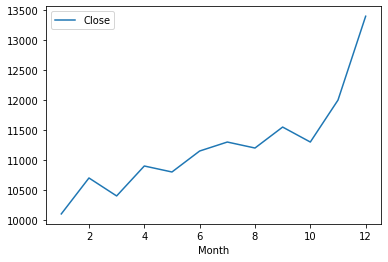

In [25]:
df_g = df_a[['Close']]
df_g.plot()

In [28]:
df_r = df_a.reset_index()

df_a = df_r.set_index('index')
df_a.head()

Month  Close  Start   High    Low  Volume  Year  \
index                                                                        
2019-01-01 00:00:00+09:00      1  10100  10850  10900  10000  137977  2018   
2019-02-01 00:00:00+09:00      2  10700  10550  10900   9990  170253  2018   
2019-03-01 00:00:00+09:00      3  10400  10900  10950  10150  155769  2018   
2019-04-01 00:00:00+09:00      4  10900  10800  11050  10500  133548  2018   
2019-05-01 00:00:00+09:00      5  10800  10900  11000  10700   63039  2018   

                            Date_m  
index                               
2019-01-01 00:00:00+09:00  2018-07  
2019-02-01 00:00:00+09:00  2018-06  
2019-03-01 00:00:00+09:00  2018-06  
2019-04-01 00:00:00+09:00  2018-06  
2019-05-01 00:00:00+09:00  2018-06

In [29]:
df_sorted = df_a.sort_index(ascending=False)
df_sorted.head()

Month  Close  Start   High    Low  Volume  Year  \
index                                                                        
2019-12-01 00:00:00+09:00     12  13400  13600  13600  12900  201376  2018   
2019-11-01 00:00:00+09:00     11  12000  13400  13400  12000  309787  2018   
2019-10-01 00:00:00+09:00     10  11300  11850  11950  11300  180656  2018   
2019-09-01 00:00:00+09:00      9  11550  11200  11600  10900  308596  2018   
2019-08-01 00:00:00+09:00      8  11200  11350  11750  11200  133002  2018   

                            Date_m  
index                               
2019-12-01 00:00:00+09:00  2018-06  
2019-11-01 00:00:00+09:00  2018-06  
2019-10-01 00:00:00+09:00  2018-06  
2019-09-01 00:00:00+09:00  2018-06  
2019-08-01 00:00:00+09:00  2018-06

In [30]:
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()

Month  Close  Start   High    Low  Volume  Year  \
index                                                                        
2019-11-01 00:00:00+09:00     11  12000  13400  13400  12000  309787  2018   
2019-09-01 00:00:00+09:00      9  11550  11200  11600  10900  308596  2018   
2019-12-01 00:00:00+09:00     12  13400  13600  13600  12900  201376  2018   
2019-10-01 00:00:00+09:00     10  11300  11850  11950  11300  180656  2018   
2019-02-01 00:00:00+09:00      2  10700  10550  10900   9990  170253  2018   

                            Date_m  
index                               
2019-11-01 00:00:00+09:00  2018-06  
2019-09-01 00:00:00+09:00  2018-06  
2019-12-01 00:00:00+09:00  2018-06  
2019-10-01 00:00:00+09:00  2018-06  
2019-02-01 00:00:00+09:00  2018-06

In [32]:
# Period 배열
pr_m = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods=3,
                      freq='M')
print(pr_m,'\n')
pr_h = pd.period_range(start = '2019-01-01',
                      end = None,
                      periods=3,
                      freq='H')
print(pr_h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


python, numpy, pandas 날짜 타입 비교 및 정리 https://ellun.tistory.com/320

In [35]:
# timestamp -> str 변환
import time
today = time.time()
print(today,type(today))
s = str(today)
print(s,type(s))

1642396271.2698398 <class 'float'>
1642396271.2698398 <class 'str'>


In [37]:
# datetime -> str
from datetime import datetime
s = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

2022-01-17 14:14:33 <class 'str'>


In [40]:
# str -> timestamp
from datetime import datetime
import time
s = '2022-01-17 14:14:33'
ts = time.mktime(datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timetuple())
print(ts)

1642396473.0


In [44]:
# str -> datetime
s = '2022-01-17 14:14:33'
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S' )
print(dt,type(dt))

2022-01-17 14:14:33 <class 'datetime.datetime'>


In [43]:
# datetime -> timestamp
print(datetime.now(),type(datetime.now()),'\n')
ts = time.mktime(datetime.now().timetuple())
print(ts,type(ts))

2022-01-17 14:22:07.863817 <class 'datetime.datetime'> 

1642396927.0 <class 'float'>


In [46]:
# [과제] str -> datetime, datetime -> str > timestamp, timestamp -> str -> datetime

s = '2022-01-20 17:23:22'
print(s,type(s),'\n')
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt),'\n')

ss = datetime.strftime(dt,'%Y-%m-%d %H:%M:%S')
print(ss,type(ss),'\n')
ts = time.mktime(datetime.strptime(ss,'%Y-%m-%d %H:%M:%S').timetuple())
print(ts,type(ts),'\n')

sss = str(ts)
print(sss,type(sss),'\n')
ddt = datetime.strptime(sss,'%Y-%m-%d %H:%M:%S')
print(ddt,type(ddt),'\n')


2022-01-20 17:23:22 <class 'str'> 

2022-01-20 17:23:22 <class 'datetime.datetime'> 

2022-01-20 17:23:22 <class 'str'> 

1642667002.0 <class 'float'> 

1642667002.0 <class 'str'> 



ValueError: time data '1642667002.0' does not match format '%Y-%m-%d %H:%M:%S'

In [48]:
# 1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days=-365)
print(delta_datetime)
datetime_now + delta_datetime

-365 days, 0:00:00


datetime.datetime(2021, 1, 17, 14, 40, 14, 875029)

In [49]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [55]:
# 특정 요일 구하기
import datetime
def get_yoil(y,m,d):
    days=['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()] # 월요일부터 인덱스 0
get_yoil(2022,1,17)

0

In [60]:
# 판다스 이용
t = pd.Timestamp(1513393335, unit='s',tz='US/Pacific')
print(t,type(t))


2017-12-15 19:02:15-08:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [61]:
today = time.time()
today

1642399731.8478372

In [62]:
date = pd.Timestamp(1642399723.4088256, unit='s',tz='Asia/Seoul')
print(date,type(date))

2022-01-17 15:08:43.408825636+09:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [63]:
pd.to_datetime([1,2,3],unit='D',origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [66]:
pr_m = pd.period_range(start='2019-01-01',end=None,periods=3, freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [84]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01',periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

date  price  profit
0 2021-01-01   1128   96.48
1 2021-01-02   1036   73.72
2 2021-01-03   1213   18.63
3 2021-01-04   1424   16.90
4 2021-01-05   1080   30.14

In [71]:
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

Date  Close  Start   High    Low  Volume
0  2018-07-02  10100  10850  10900  10000  137977
1  2018-06-29  10700  10550  10900   9990  170253
2  2018-06-28  10400  10900  10950  10150  155769
3  2018-06-27  10900  10800  11050  10500  133548
4  2018-06-26  10800  10900  11000  10700   63039

In [105]:
# Q. stock_data.csv를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후 년, 월, 일로 분리하고 year를 인덱스로 세팅하여 출력하세요.
df = pd.read_csv('./dataset/stock-data.csv')
df.set_index('new_Date',inplace=True)
# df['Year'] = df.new_Date.dt.year
# df['Date']=df['Date'].astype('str')
# pd.to_datetime(df['Date']).
# datetime(df['Date'],'%Y-%m-%d')


KeyError: "None of ['new_Date'] are in the columns"

In [ ]:
# Q. stock_data.csv를 데이터프레임으로 불러와서 datetime 64 자료형으로 변환한 후에 period로 변환하고 년월일 표기 변경하여 년월을 
# 인덱스로 세팅하여 출력하세요.

In [106]:
df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

연월일   당일종가  전일종가     시가     고가     저가     거래량
0  2018-07-02  10100   600  10850  10900  10000  137977
1  2018-06-29  10700   300  10550  10900   9990  170253
2  2018-06-28  10400   500  10900  10950  10150  155769
3  2018-06-27  10900   100  10800  11050  10500  133548
4  2018-06-26  10800   350  10900  11000  10700   63039

In [107]:
df = pd.read_csv('./dataset/auto-mpg.csv')
df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [114]:
# [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요.
df['kpl']=df.mpg*0.425144
df['kpl'].loc[2].round(2)
df

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name        kpl  
0            70       1  chevrolet chevelle malibu   7.652592  
1            70       1          buick skylark 320   6.377160  
2            70       1         plymouth satellite   7.652592  
3            70       1              amc rebel sst   6.802304  
4            70       1                ford torino   7.227448  
..          ...     ...                        ...        ...  
393          82       1            ford mustang gl  11.478888  
394          82       2                  vw pickup  18.706336  
395          82       1              dodge rampage  13.604608  
396          82       1                ford ranger  11.904032  
397          82       1                 chevy s-10  13.179464  

[398 rows x 10 columns]

In [ ]:
# [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 되어있는 이유 및 float로 처리)
# hint : np.nan으로 대체

In [ ]:
# [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 출력하세요

In [ ]:
# [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.

In [ ]:
# [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.

In [ ]:
# [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값-최소값을 분모로 계산하여 저장하세요.

In [ ]:
# [과제] origin열의 고유값을 출력하세요.

In [ ]:
# [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요(1:'USA',2:'EU',3:'JAPAN')


In [ ]:
# [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.

In [ ]:
# [과제] origin열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.


In [ ]:
# [과제] horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력', '고출력']으로 출력하세요.
# np.histogram() 함수로 3개의 bin으로 나눔

In [ ]:
# [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요.